In [11]:
import igraph
import pandas as pd
from pathlib import Path
from igraph import Graph, plot

In [12]:
path1=Path("/Users/zainabnazari/data_work")

In [13]:
file_no1 = pd.read_csv(path1/'string_interactions_short.tsv', delimiter='\t')
file_no1

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,A2m,Mmp9,10090.ENSMUSP00000032203,10090.ENSMUSP00000017881,0.000,0,0.000,0.00,0.054,0.052,0.5,0.461,0.726
1,A2m,Hspa5,10090.ENSMUSP00000032203,10090.ENSMUSP00000028222,0.000,0,0.000,0.00,0.054,0.084,0.0,0.958,0.960
2,A2m,Ttr,10090.ENSMUSP00000032203,10090.ENSMUSP00000074783,0.000,0,0.000,0.00,0.087,0.000,0.0,0.739,0.752
3,Acad8,Eci3,10090.ENSMUSP00000054370,10090.ENSMUSP00000021853,0.062,0,0.000,0.00,0.660,0.098,0.0,0.177,0.731
4,Ace,Ins2,10090.ENSMUSP00000001963,10090.ENSMUSP00000147425,0.000,0,0.000,0.00,0.045,0.000,0.0,0.742,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Slc12a2,Slc4a2,10090.ENSMUSP00000111023,10090.ENSMUSP00000078972,0.000,0,0.000,0.00,0.062,0.000,0.0,0.730,0.736
96,Slc28a3,Slc29a4,10090.ENSMUSP00000022036,10090.ENSMUSP00000059896,0.000,0,0.000,0.00,0.057,0.000,0.0,0.742,0.746
97,Steap1,Steap2,10090.ENSMUSP00000015796,10090.ENSMUSP00000111086,0.000,0,0.064,0.92,0.581,0.000,0.9,0.427,0.974
98,Stra6,Ttr,10090.ENSMUSP00000130232,10090.ENSMUSP00000074783,0.000,0,0.000,0.00,0.045,0.000,0.5,0.637,0.811


In [14]:
file_no1.rename(columns={"#node1": "node1"}, inplace=True)


In [15]:
file_no11=file_no1[['node1','node2','combined_score']]

In [31]:
file_no11

,node1,node2,combined_score
0,A2m,Mmp9,0.726
1,A2m,Hspa5,0.960
2,A2m,Ttr,0.752
3,Acad8,Eci3,0.731
4,Ace,Ins2,0.743
...,...,...,...
95,Slc12a2,Slc4a2,0.736
96,Slc28a3,Slc29a4,0.746
97,Steap1,Steap2,0.974
98,Stra6,Ttr,0.811


In [39]:
file_no11['node1'] =file_no11['node1'].astype(str)
file_no11['node2'] = file_no11['node2'].astype(str)

/Users/zainabnazari/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/zainabnazari/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
type(file_no11['node1'])

pandas.core.series.Series

Nodes in the graph: ['A2m', 'Mmp9', 'Hspa5', 'Ttr', 'Acad8', 'Eci3', 'Ace', 'Ins2', 'Acox2', 'Atp2b3', 'Calml4', 'Atp7a', 'Slc31a1', 'Bhmt', 'Chdh', 'Trpv4', 'Cd22', 'Cd79a', 'Cd79b', 'Cd55', 'Cd59a', 'Vpreb1', 'Cdkn1c', 'Igf2', 'Cgn', 'Cldn1', 'Tjp3', 'Pla2g5', 'Cldn9', 'Cldn2', 'Cldn3', 'Marveld3', 'Krt8', 'Epcam', 'Col1a1', 'Loxl2', 'Col7a1', 'Lamb1', 'Loxl1', 'Itgb6', 'Postn', 'Pcolce', 'Col5a1', 'Col1a2', 'Col4a3', 'Col4a4', 'Col8a1', 'Col8a2', 'Crhr2', 'Pomc', 'Drc7', 'Tcte1', 'Dsp', 'Perp', 'Krt18', 'Pkp2', 'Esrrb', 'Otx2', 'Folr1', 'Folr2', 'Fras1', 'Frem1', 'Gpx8', 'Nqo1', 'Sdf2l1', 'Htr2c', 'Ngfr', 'Igfbp2', 'Mest', 'Lepr', 'Itgax', 'Serpinb1b', 'Sell', 'Kcne2', 'Kcnh2', 'Lmx1a', 'Mc3r', 'Mrap2', 'Mfrp', 'Rd3', 'Scube3', 'Ntf5', 'Oca2', 'Slc24a5', 'Pcdhb11', 'Pcdhb6', 'Slc12a2', 'Slc4a2', 'Slc28a3', 'Slc29a4', 'Steap1', 'Steap2', 'Stra6', 'Trpm3']
Edges in the graph: [(0, 1), (0, 2), (0, 3), (4, 5), (6, 7), (1, 6), (5, 8), (9, 10), (11, 12), (13, 14), (10, 15), (16, 17), (16,

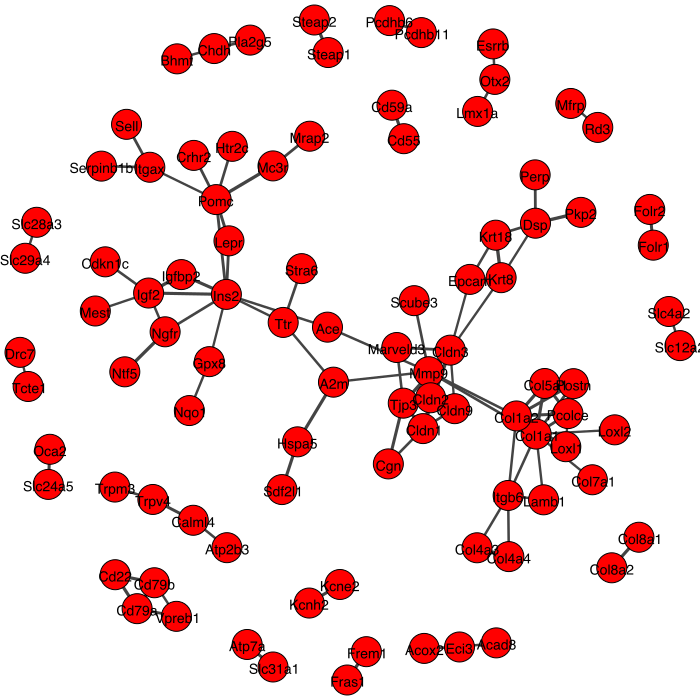

In [40]:
import pandas as pd
from igraph import Graph, plot

# Sample DataFrame with node names and scores
data = {
    "node1": ["A", "B", "C", 'G'],
    "node2": ["B", "C", "D",'V'],
    "combinedscore": [13, 8, 3,6]  # Strength of connection
}

df = pd.DataFrame(data)

# Create an igraph Graph object from the edge list
g = Graph.TupleList(file_no11.itertuples(index=False), directed=False, weights=True)

# Assign vertex labels using the 'name' attribute
g.vs["label"] = g.vs["name"]

# Print the node names to verify
print("Nodes in the graph:", g.vs["name"])

# Print the edges to verify connections
print("Edges in the graph:", g.get_edgelist())

# Plot the graph with weighted edges
plot(g, bbox=(700,700), vertex_size=30, edge_width=[w / 0.3 for w in g.es["weight"]])


Nodes in the graph: ['A2m', 'Mmp9', 'Hspa5', 'Ttr', 'Acad8', 'Eci3', 'Ace', 'Ins2', 'Acox2', 'Atp2b3', 'Calml4', 'Atp7a', 'Slc31a1', 'Bhmt', 'Chdh', 'Trpv4', 'Cd22', 'Cd79a', 'Cd79b', 'Cd55', 'Cd59a', 'Vpreb1', 'Cdkn1c', 'Igf2', 'Cgn', 'Cldn1', 'Tjp3', 'Pla2g5', 'Cldn9', 'Cldn2', 'Cldn3', 'Marveld3', 'Krt8', 'Epcam', 'Col1a1', 'Loxl2', 'Col7a1', 'Lamb1', 'Loxl1', 'Itgb6', 'Postn', 'Pcolce', 'Col5a1', 'Col1a2', 'Col4a3', 'Col4a4', 'Col8a1', 'Col8a2', 'Crhr2', 'Pomc', 'Drc7', 'Tcte1', 'Dsp', 'Perp', 'Krt18', 'Pkp2', 'Esrrb', 'Otx2', 'Folr1', 'Folr2', 'Fras1', 'Frem1', 'Gpx8', 'Nqo1', 'Sdf2l1', 'Htr2c', 'Ngfr', 'Igfbp2', 'Mest', 'Lepr', 'Itgax', 'Serpinb1b', 'Sell', 'Kcne2', 'Kcnh2', 'Lmx1a', 'Mc3r', 'Mrap2', 'Mfrp', 'Rd3', 'Scube3', 'Ntf5', 'Oca2', 'Slc24a5', 'Pcdhb11', 'Pcdhb6', 'Slc12a2', 'Slc4a2', 'Slc28a3', 'Slc29a4', 'Steap1', 'Steap2', 'Stra6', 'Trpm3']
Edges in the graph: [(0, 1), (0, 2), (0, 3), (4, 5), (6, 7), (1, 6), (5, 8), (9, 10), (11, 12), (13, 14), (10, 15), (16, 17), (16,

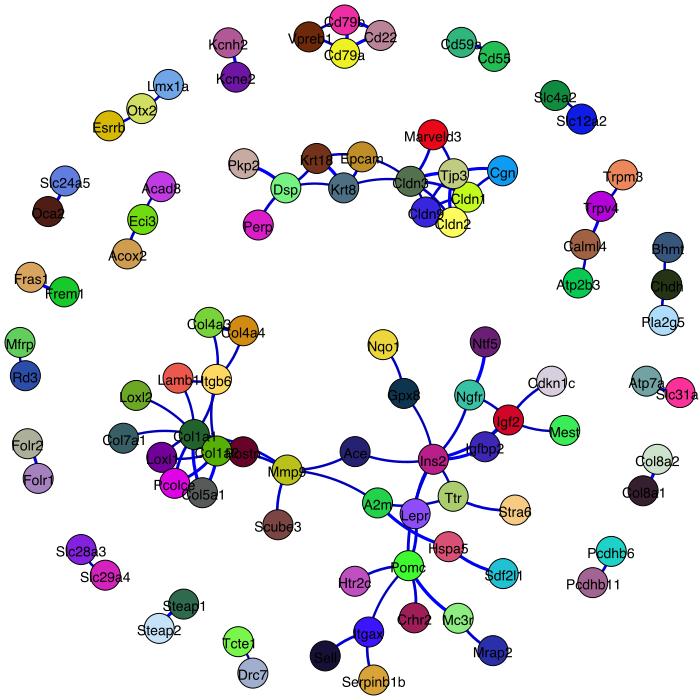

In [45]:
import pandas as pd
from igraph import Graph, plot
import random

# Sample DataFrame with node names and scores
data = {
    "node1": ["A", "B", "C", 'G'],
    "node2": ["B", "C", "D", 'V'],
    "combinedscore": [13, 8, 3, 6]  # Strength of connection
}

df = pd.DataFrame(data)

# Create an igraph Graph object from the edge list
g = Graph.TupleList(file_no11.itertuples(index=False), directed=False, weights=True)

# Assign vertex labels using the 'name' attribute
g.vs["label"] = g.vs["name"]

# Assign vertex colors based on some criteria (e.g., random colors)
g.vs["color"] = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(len(g.vs))]

# Assign edge colors based on weight (stronger connections have darker shades)
edge_colors = ['#%02X%02X%02X' % (0, 0, int(255 * (weight / max(g.es["weight"])))) for weight in g.es["weight"]]
g.es["color"] = edge_colors

# Print the node names to verify
print("Nodes in the graph:", g.vs["name"])

# Print the edges to verify connections
print("Edges in the graph:", g.get_edgelist())

# Plot the graph with customized attributes
plot(g, 
     bbox=(700, 700), 
     vertex_size=30, 
     edge_width=[w / 0.3 for w in g.es["weight"]],
     vertex_label_color='black',  # Change vertex label color
     edge_curved=0.2,  # Slightly curved edges for better aesthetics
     margin=20)  # Add margin around the plot


In [10]:
file_no2 = pd.read_csv(path1/'string_protein_annotations.tsv', delimiter='\t')
file_no2

,#node,identifier,domain_summary_url,annotation,other_names_and_aliases
0,A2m,10090.ENSMUSP00000032203,Alpha-2-macroglobulin-P; Is able to inhibit al...,https://smart.embl.de/smart/DDvec.cgi?smart=14...,"232345,A0A0N4SUX6,A2MG_MOUSE,A2m,A2m-201,A2m-2..."
1,Abca4,10090.ENSMUSP00000013995,Retinal-specific phospholipid-transporting ATP...,https://smart.embl.de/smart/DDvec.cgi?smart=23...,"11304,7.6.2.1,A0A0G2JGG8,AAC23916.1,AAH57853.1..."
2,Acad8,10090.ENSMUSP00000054370,"Isobutyryl-CoA dehydrogenase, mitochondrial; I...",https://smart.embl.de/smart/DDvec.cgi?smart=41...,"1.3.8.-,1.3.99.-,2310016C19Rik,66948,A0A0R4J0P..."
3,Ace,10090.ENSMUSP00000001963,"Angiotensin-converting enzyme, soluble form; C...",https://smart.embl.de/smart/DDvec.cgi?smart=13...,"11421,3.2.1.-,3.4.15.1,AAA37146.1,AAA37147.1,A..."
4,Ackr4,10090.ENSMUSP00000075507,Atypical chemokine receptor 4; Atypical chemok...,https://smart.embl.de/smart/DDvec.cgi?smart=35...,"252837,A630091E18Rik,AAK81712.1,AAL68400.1,AAL..."
...,...,...,...,...,...
278,Wdr86,10090.ENSMUSP00000064785,WD repeat domain 86.,https://smart.embl.de/smart/DDvec.cgi?smart=38...,"269633,2810046M22Rik,AC137938,BC059069,CCDS390..."
279,Wfdc2,10090.ENSMUSP00000017867,WAP four-disulfide core domain protein 2; Broa...,https://smart.embl.de/smart/DDvec.cgi?smart=17...,"1600023A02Rik,67701,A2A5G4,A2A5G5,A2A5G6,AAH99..."
280,Wfikkn2,10090.ENSMUSP00000053238,"WAP, Kazal, immunoglobulin, Kunitz and NTR dom...",https://smart.embl.de/smart/DDvec.cgi?smart=57...,"2610304F08Rik,278507,6MAA,AAP72503.1,AL645846,..."
281,Zfp185,10090.ENSMUSP00000126066,Zinc finger protein 185; May be involved in th...,https://smart.embl.de/smart/DDvec.cgi?smart=48...,"22673,A2BI37,AL807751,B1AXE7,BX813330,CCDS3019..."
